In [1]:
import pandas as pd

# Load the files to check their structure
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

# Preview each dataset
print("Train CSV Columns:", train.columns)
print("Test CSV Columns:", test.columns)
print("Gender Submission CSV Columns:", gender_submission.columns)


Train CSV Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Test CSV Columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Gender Submission CSV Columns: Index(['PassengerId', 'Survived'], dtype='object')


**load the data**

In [2]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('train.csv')

# Preview the dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**understand the dataset**

In [3]:
# Check dataset info
print(df.info())

# Check summary statistics
print(df.describe(include='all'))

# View column names
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top  

**Handle Missing Values**

In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values or drop rows
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing ages with median
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing embarked with mode
df = df.drop(columns=['Cabin'])  # Drop 'Cabin' due to a high percentage of missing values

# Verify no missing values remain
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Feature Engineering**



In [5]:
# Convert 'Sex' to numerical: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create a new feature: FamilySize = SibSp + Parch
df['FamilySize'] = df['SibSp'] + df['Parch']


**5. Exploratory Data Analysis (EDA) - Analyze Data Distributions**

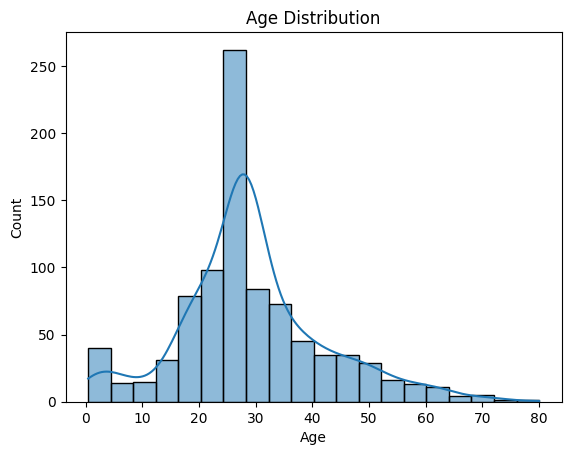

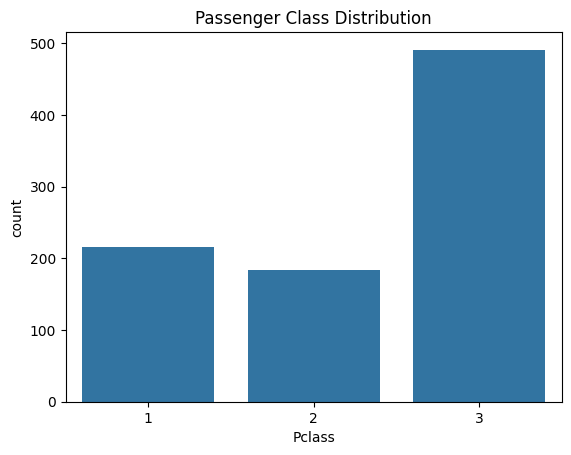

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution of passenger classes
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()


**5.2 Analyze Survival Rates**

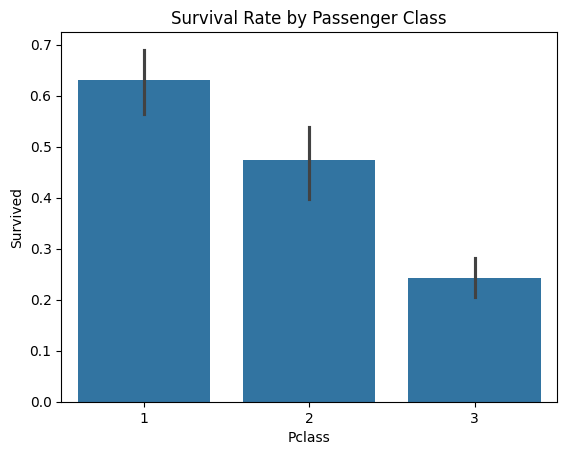

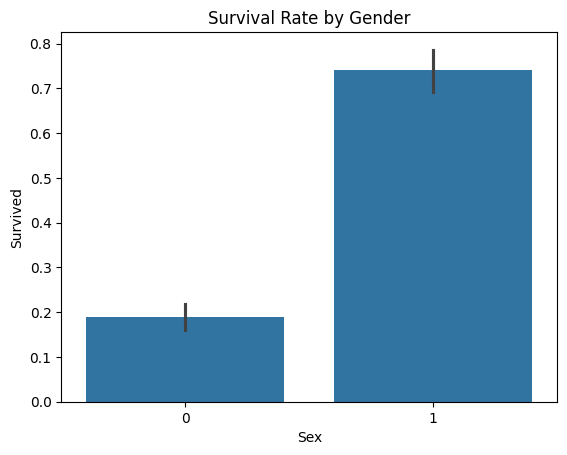

In [7]:
# Survival rates by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rates by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


**5.3 Correlation Heatmap**



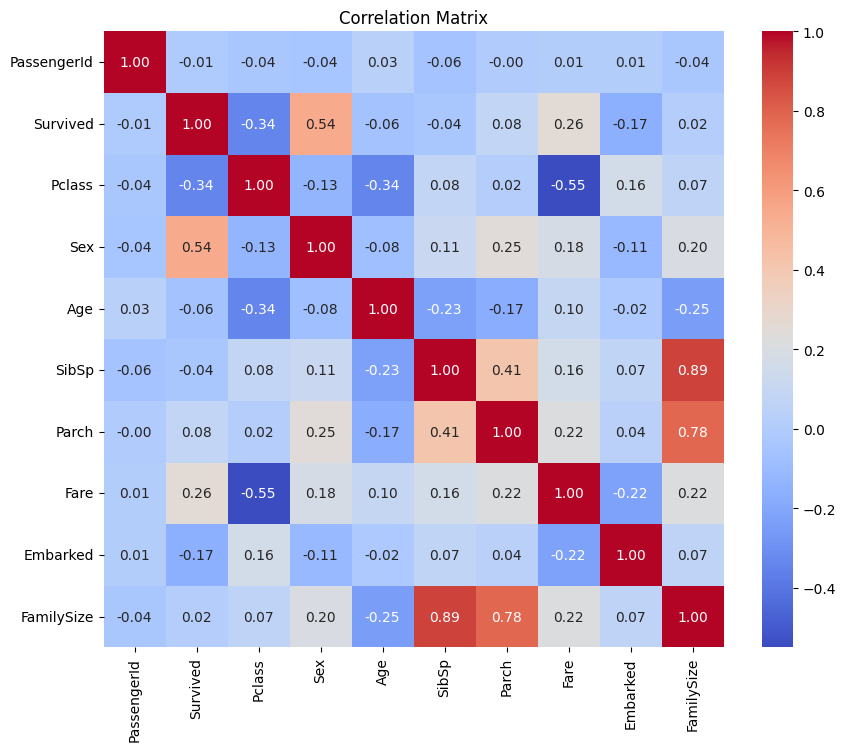

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Heatmap of correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**5.4 Pairplot**



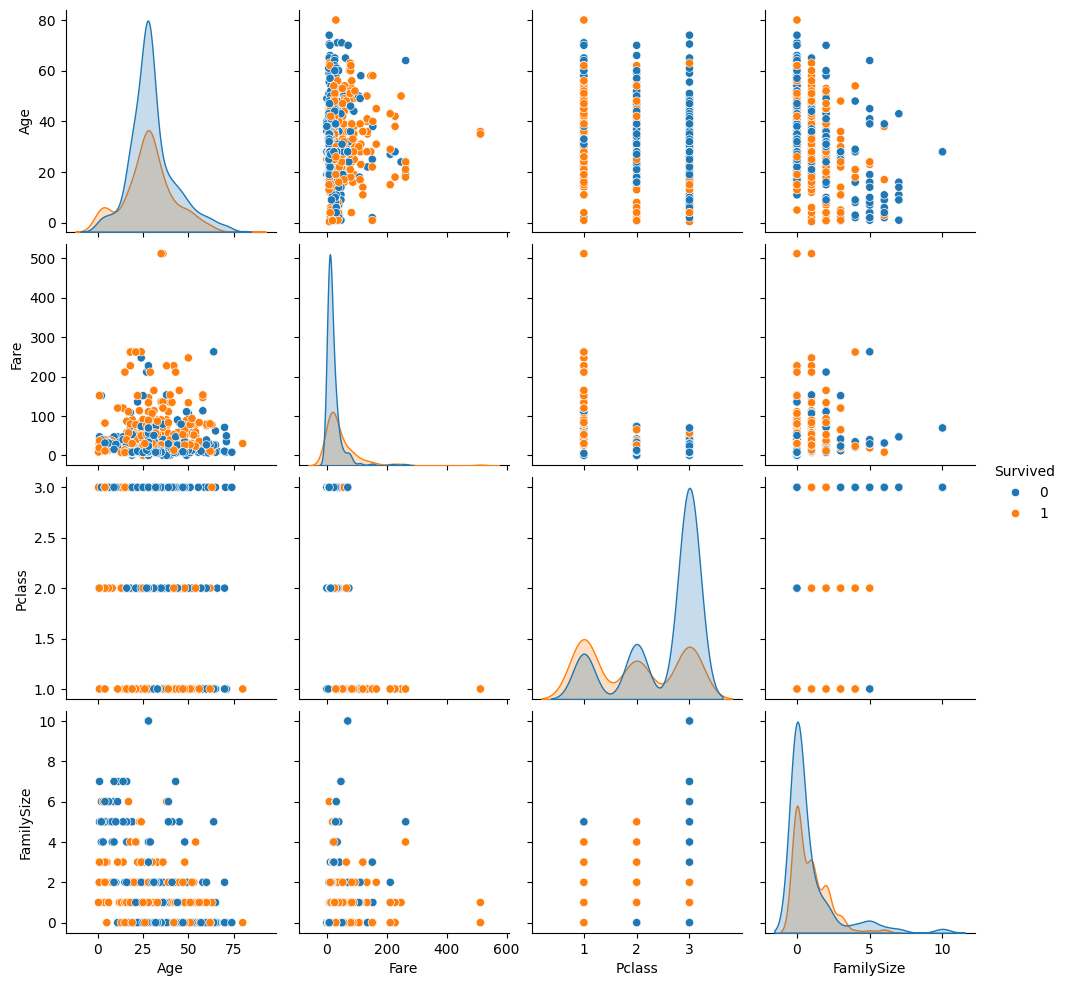

In [10]:
# Pairplot for numerical variables
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'FamilySize']], hue='Survived')
plt.show()


**5.5 Grouped Insights**

Embarked
0    0.553571
1    0.389610
2    0.339009
Name: Survived, dtype: float64


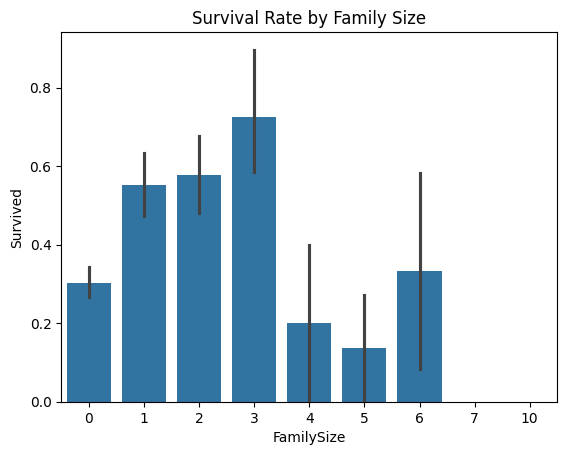

In [11]:
# Survival rate by Embarked
print(df.groupby('Embarked')['Survived'].mean())

# Survival rate by Family Size
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()


**6. Save the Cleaned Dataset**

In [12]:
df.to_csv('titanic_cleaned.csv', index=False)
